# **1. Defining the Question:**
## a) Specifying the question:


> How can we determine the factors that contribute to financial inclusion in Kenya, Rwanda, Tanzania and Uganda?




---





## b) Defining the metric for success: 


> Results showing the top factors affecting financial inclusion





## c) Understanding the context: 


> Data showing financial inclusion in Kenya, Rwanda, Tanzania and Uganda

## d) Recording the experimental design: 


> This analysis looks at the univariate, bivariate and multivariate variables that affect financial inclusion in the respective countries within the years 2016 to 2018

## d) Data relevance: 


> The data collected is relevant for our analysis. However, the data can be improved upon by collecting similar data for all the countries for all the years of analysis. As it is, the Rwandan Dataset relates to the year 2016, the Tanzanian adtaset relates to the year 2017 and the Kenyan and Ugandan datasets relate to the year 2018. This does not bring uniformity in the data collection process. Aditiionally, the sample sizes differ per country thus creating bias. We are also not told what criteria was used to select the respondents form the total population of the respective countries.

# **2. Reading the data:**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load and read the Dataset**



In [ ]:
#!pip install pyreadstat
#uganda =pd.read_spss("/content/Final FS Uganda 2018 dataset.sav")
#uganda.sample(15)
financial_data = pd.read_csv("/content/Financial Dataset.csv")
financial_data.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
# Determine the number of records in the file 
print("The data has " + str(financial_data.shape[0]) + " rows and " + str(financial_data.shape[1]) + " columns.")

The data has 23524 rows and 13 columns.


# **3. Univariate Analysis:**

## **Clean the dataset and perform EDA**


In [ ]:

# checking for null values
financial_data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Drop null values and check to see that the null values have been dropped
financial_data.dropna(axis=0, inplace=True)
financial_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
# Check the shape of the dataset after dropping the null values
print("The data has " + str(financial_data.shape[0]) + " rows and " + str(financial_data.shape[1]) + " columns.")
# The dataset has dropped 181 rows

The data has 23343 rows and 13 columns.


In [ ]:
# Preview the dataset
financial_data.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
# Rename the columns so that they are similar while ommitting spelling mistakes
financial_data.rename(columns = {'Has a Bank account':'bank_account', 'Type of Location':'location', 'Cell Phone Access':'cell_phone_access',
'The relathip with head':'relationship_with_head', 'Level of Educuation': 'education_level'}, inplace = True) 
   

In [ ]:
# Preview the dataset
financial_data.head(2)

,country,year,uniqueid,bank_account,location,cell_phone_access,household_size,Respondent Age,gender_of_respondent,relationship_with_head,marital_status,education_level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
# checking whether the dataset has appropriate datatypes
financial_data.dtypes

country                    object
year                        int64
uniqueid                   object
bank_account               object
location                   object
cell_phone_access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
Type of Job                object
dtype: object

In [ ]:
# checking for unique values in each column. This will help show whether there are any abnormal data entries (outliers) in the 
# categorical columns (and one date column) of the dataset
print(financial_data['relationship_with_head'].unique())
print(financial_data['marital_status'].unique())
print(financial_data['education_level'].unique())
print(financial_data['Type of Job'].unique())
print(financial_data['gender_of_respondent'].unique())
print(financial_data['cell_phone_access'].unique())
print(financial_data['location'].unique())
print(financial_data['bank_account'].unique())
print(financial_data['year'].unique())
print(financial_data['country'].unique())


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']
['Female' 'Male']
['Yes' 'No']
['Rural' 'Urban']
['Yes' 'No']
[2018 2029 2056 2016 2039 2017]
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


In [ ]:
# From the analysis above, we see that the column "level of education" has an abnormal data entry with the number "6" while the 
# column year has three abnormal entries relating to the years "2029, 2056 and 2039". We next check the instances of these abnormal entries

print("The entry 6 appears " + str(financial_data[financial_data['education_level'] == '6'].shape[0]) + " times under the column education_level")
print("The entry 2029 appears " + str(financial_data[financial_data['year'] == 2029].shape[0]) +" times under the column Year")
print("The entry 2056 appears " + str(financial_data[financial_data['year'] == 2029].shape[0]) +" times under the column Year")
print("The entry 2039 appears " + str(financial_data[financial_data['year'] == 2029].shape[0]) +" times under the column Year")


The entry 6 appears 27 times under the column education_level
The entry 2029 appears 1 times under the column Year
The entry 2056 appears 1 times under the column Year
The entry 2039 appears 1 times under the column Year


In [ ]:
# Just by looking at the dataset, we have no way of knowing the level of education of these 27 respondents. These 27 respondents will thus be
# dropped from the dataset as we clean it up for analysis. Similaryly, we will drop the other 3 rows (NB: It would be possible to tell which specific country
# each of these 3 rows belongs to and thereafter impute that country's year into the row year cell. However, because they are only 3 rows, the effort needed
# surpasses the benefits of carrying out that analysis)
financial_data.drop(financial_data[financial_data['education_level'] == '6'].index, inplace = True)
financial_data.drop(financial_data[financial_data['year'] == 2029].index, inplace = True)
financial_data.drop(financial_data[financial_data['year'] == 2056].index, inplace = True)
financial_data.drop(financial_data[financial_data['year'] == 2039].index, inplace = True)

In [ ]:
# Check the shape of the dataset after dropping the rows with abnormal data
print("The data has " + str(financial_data.shape[0]) + " rows and " + str(financial_data.shape[1]) + " columns.")

# The dataset has dropped 30 rows

The data has 23313 rows and 13 columns.


In [ ]:
# Confirming that these abnormal entries in the categorical columns (and one date column) have been dropped
print(financial_data['relationship_with_head'].unique())
print(financial_data['marital_status'].unique())
print(financial_data['education_level'].unique())
print(financial_data['Type of Job'].unique())
print(financial_data['gender_of_respondent'].unique())
print(financial_data['cell_phone_access'].unique())
print(financial_data['location'].unique())
print(financial_data['bank_account'].unique())
print(financial_data['year'].unique())
print(financial_data['country'].unique())

['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']
['Female' 'Male']
['Yes' 'No']
['Rural' 'Urban']
['Yes' 'No']
[2018 2016 2017]
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


(array([3071., 3658., 3466., 3307., 2177., 1945., 1712., 1173.,  980.,
         704.,  525.,  357.,  138.,   65.,   35.]),
 array([ 16. ,  21.6,  27.2,  32.8,  38.4,  44. ,  49.6,  55.2,  60.8,
         66.4,  72. ,  77.6,  83.2,  88.8,  94.4, 100. ]),
 <a list of 15 Patch objects>)

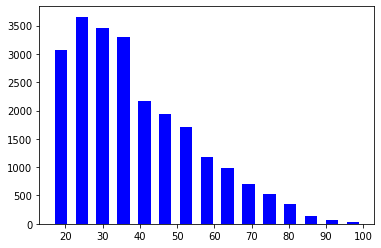

In [ ]:
# Drawing histograms for the age numerical column in the dataset so as to check for outliers
plt.hist(financial_data['Respondent Age'], bins=15, color="blue", rwidth=.6)
# Our dataset seems to have a larger proportion from the younger generation with bank accounts (positive skew). This makes sense as the older population
# passes away - we can see that at 100 there are very few people with bank accounts.

In [ ]:
# Calculate the measures of dispersion for the respondents age
print("The respondent age has a variance of: " + str(financial_data['Respondent Age'].var()))
print("The respondent age has a standard deviation of: " + str(financial_data['Respondent Age'].std()))
print("The respondent age has a mode: " + str(financial_data['Respondent Age'].mode()))
print("The respondent age has a median: " + str(financial_data['Respondent Age'].median()))
print("The respondent age has a skew of: " + str(financial_data['Respondent Age'].skew()))
print("The respondent age has a kurtosis of: " + str(financial_data['Respondent Age'].kurt()))

# The standard deviation measures the variability around the mean. With a standard deviation of 16.51 and a mean of 38.79, we can 
# be sure that 68% (confidence band) of our values lie within one standard deviation of the mean (i.e between the ages 23.28 and 55.3).
# Alternatively, 95% (confidence band) of our values lie within two standard deviations from the mean (i.e. between the ages 5.77 and 71.81).

# On the other hand, the mode shows us the most commonly occuring age, which is 30 while the average age of the respondents is 38 and the median is 35
# This shows that the data has a positive skew (mean>median>mode), which is further confirmed by the skewness measure which has a value of 0.84
# (See the cell output above for the visual representation of the positive skew of the data)


# With a kurtosis of 0.10 our data shows that it has slightly more outliers than a normal distribution curve

The respondent age has a variance of: 272.6002638005803
The respondent age has a standard deviation of: 16.510610642873882
The respondent age has a mode: 0    30.0
dtype: float64
The respondent age has a median: 35.0
The respondent age has a skew of: 0.8412764239448531
The respondent age has a kurtosis of: 0.10122691422605756


(array([9.024e+03, 6.707e+03, 4.737e+03, 2.116e+03, 5.450e+02, 1.310e+02,
        3.400e+01, 1.500e+01, 2.000e+00, 2.000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

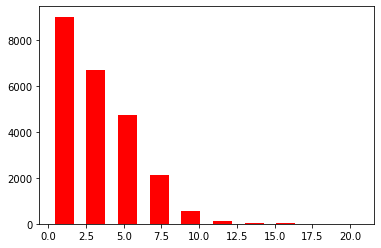

In [ ]:
# Plot the histogram for the household size numerical column in the dataset so as to check for outliers
plt.hist(financial_data['household_size'], bins=10, color="Red", rwidth=.6)

# Our data has a positive skew indicating that most households have 5 or fewer members in the house. We do have some abnormal households on the extreme
# end having 20 members. However, we will assume that this high membership is due to a polygamous family (In Africa, a few households still practice
# polygamy. Thus, because we don't have any additional information on the dataset, we will not exclude households with high number of members

In [ ]:
# Calculate the measures of dispersion for the respondents household size
print("The respondent household size has a variance of: " + str(financial_data['household_size'].var()))
print("The respondent household size has a standard deviation of: " + str(financial_data['household_size'].std()))
print("The respondent household size has a mean of: " + str(financial_data['household_size'].mean()))
print("The respondent household size has a mode: " + str(financial_data['household_size'].mode()))
print("The respondent household size has a median: " + str(financial_data['household_size'].median()))
print("The respondent household size has a skew of: " + str(financial_data['household_size'].skew()))
print("The respondent household size has a kurtosis of: " + str(financial_data['household_size'].kurt()))

# The standard deviation of the household size column is less than the standard deviation of the age. 
# With a standard deviation of 2.28 and a mean of 3.68, 95% (confidence band) of our values lie within two standard deviations 
# from the mean (i.e. between the household sizes of -0.88 and and 8.24). Of course care should be taken in interpreting this standard deviation measure
# because one cannot have a household of negative people!

# On the other hand, the mode shows us that most households are composed of two people (given that the data is skewed towards the younger population,
# this propbably means that most households are young couples (i.e. husband and wife yet to get a child)

# The median and means also confirm that the data has a positive skew (mean>median>mode), which is further confirmed
# by the skewness measure which has a value of 0.97

# With a kurtosis of 1.15 our data is leptokurtic and has a large presence of outliers (This can be seen by the histogram chart above that has plotted
# the household ages)

The respondent household size has a variance of: 5.202240934822759
The respondent household size has a standard deviation of: 2.2808421547364386
The respondent household size has a mean of: 3.688414189508
The respondent household size has a mode: 0    2.0
dtype: float64
The respondent household size has a median: 3.0
The respondent household size has a skew of: 0.9737983207814955
The respondent household size has a kurtosis of: 1.1530073057375057


In [ ]:
financial_data.head(2)

,country,year,uniqueid,bank_account,location,cell_phone_access,household_size,Respondent Age,gender_of_respondent,relationship_with_head,marital_status,education_level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
financial_data_boxplots = df.drop('a', inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


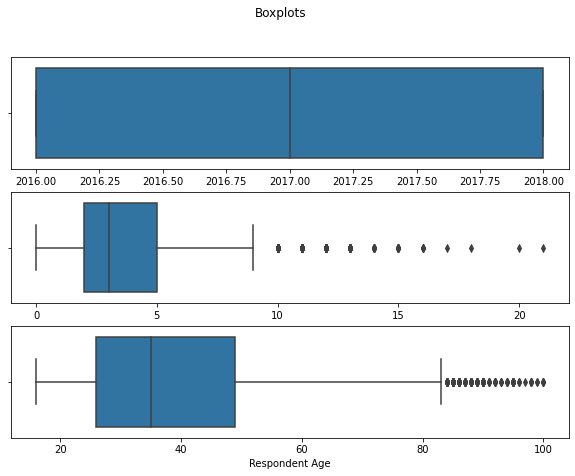

In [ ]:
# Checking for Outliers using boxplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 7))
fig.suptitle('Boxplots') # Gives the title of the boxplots
sns.boxplot(financial_data['year'], ax=ax1)
sns.boxplot(financial_data['household_size'], ax=ax2)
sns.boxplot(financial_data['Respondent Age'], ax=ax3)
plt.show()

# Gives the same details as the histograms above and the unique methodoogy as employed above. As explained, these outliers will not be dropped.

In [ ]:
# Describe the numerical data in the dataset
financial_data.describe()

# Shows that the average age for the repondents was 38.7 years, with the maximum age being 100 and minimum being 16 years
# Average household size was 3.6 people per household despite having a household(s) with 21 people
# The average year is 2016 with the maximum being 2018 and minimum being 2016. The data is thus skewed towards 2016 showing that the dataset 
# interviewed more people in 2016 (The dataset is ths heavily skewed towards Rwanda respondents as this is the country in which the survey was done in 2016)


,year,household_size,Respondent Age
count,23313.000000,23313.000000,23313.000000
mean,2016.977952,3.688414,38.793549
std,0.849034,2.280842,16.510611
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


# **3. Bivariate Analysis:**


> ## First, split the dataset into respondents with bank accounts and those that don't have accounts



## a) Univariate analysis on respondents that have bank accounts

In [ ]:
# First, separate the data into two, the respondents that have a bank account and the respondents that don't have a bank account. This will enable us 
# to draw histograms on the various categorical datasets in respect to the bank account (itself a categorical dataset as well) so as to see which variables
# singularly have the most impact on whether the respondent has a bank account or not 

yes_bank_account = financial_data[financial_data['bank_account'] == "Yes"]
yes_bank_account.shape

(3291, 13)

In [ ]:
# Preview the dataset
yes_bank_account.head(2)

,country,year,uniqueid,bank_account,location,cell_phone_access,household_size,Respondent Age,gender_of_respondent,relationship_with_head,marital_status,education_level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [ ]:
# describe the numerical data
yes_bank_account.describe()

# Lokking at the data below and comparing it to our previous description, some interesting facts crop up. We see for example 
# that the 100 year old respondent doesn't operate a bank account, as the highest age is mow 95. We also see that the respondent(s) in
# the household(s) with 21 people doesn't operate a bank account. Probably the high number of people in the house means that the respondent
# does nit have extra cash to put up as savings. We also note that the mean household size for the respondents with bank accounts is sloghtly
# lower than that of the total population, something that tallies with the drop of the largest household from this dataset. Finally, the mean year is 
# slighly higher than that of the total population, indicating that more people opened up bank accounts in 2017.

,year,household_size,Respondent Age
count,3291.000000,3291.000000,3291.000000
mean,2017.214828,3.560316,39.579155
std,0.878849,2.215912,14.331042
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,29.000000
50%,2018.000000,3.000000,36.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,17.000000,95.000000


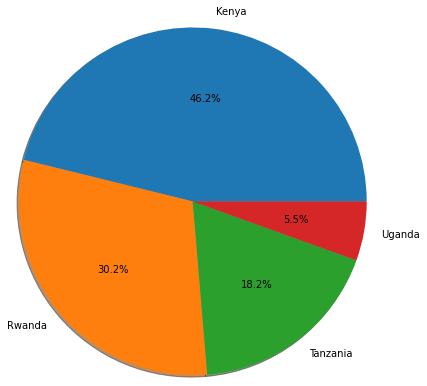

In [ ]:
# Analyze which country has respondents with the most bank accounts. Since there are only 4 countries, we can use a pie chart for this analysis
# First group the dataset as per country
yes_country = yes_bank_account.groupby(yes_bank_account['country']).count()
yes_country

# Plot the pie chart
plt.pie(yes_country['bank_account'], labels = yes_country.index, autopct='%1.1f%%', shadow=True, radius = 2)
plt.show()

# The analysis shows that Kenya has the highest population with respondents who have an operational bank account.
# Financial inclusion in Kenya is thus high compared to the other East African Countries.

Text(0.5, 1.0, ' Respondents with bank accounts per year')

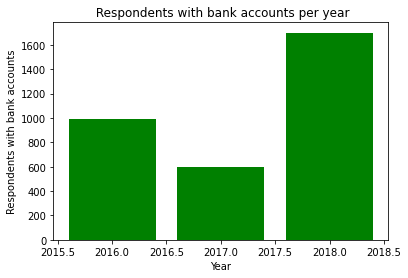

In [ ]:
# Analyze the years with the most financial inclusion
yes_year = yes_bank_account.groupby(yes_bank_account['year']).count()
yes_year

# Plot a bar chart to show the years with the most financial inclusion
plt.bar(yes_year.index, yes_year['country'], color ="green")

# Labelling the axis
plt.ylabel ("Respondents with bank accounts")
plt.xlabel("Year")

# Title
plt.title (" Respondents with bank accounts per year")

# It is interesting to note that the resppondents that indicated financial inclusion dipped in 2017 before recovering and 
# surpassing the 2016 levels in the year 2018 (more people opted to open up bank accounts in 2018).
# Further analysis needs to be made to understand why there was a dip in this year. This data is not available in our dataset hence no further 
# analysis can be done with the current dataset.

Text(0.5, 1.0, 'Location of Bank Accounts')

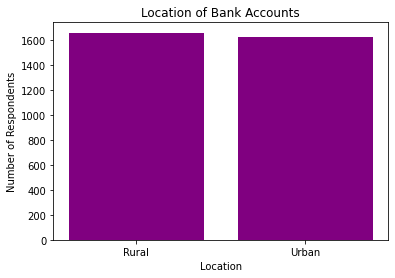

In [ ]:
# Analyze the dataset based on location (Rural or Urban)
# NB: While ideally we can do this per country, the analysis below will be a combination of all the countries
yes_rural = yes_bank_account.groupby(yes_bank_account['location']).count()
yes_rural

# Plot a bar chart to show the years with the most financial inclusion
plt.bar(yes_rural.index, yes_rural['country'], color ="purple")

# Labelling the axis
plt.ylabel ("Number of Respondents")
plt.xlabel("Location")

# Title
plt.title ("Location of Bank Accounts")

# For the respondents with bank accounts, the analysis below shows that the location of the respondents did not have a large input as to whether 
# they opened up bank accounts or not, which is a positive. 

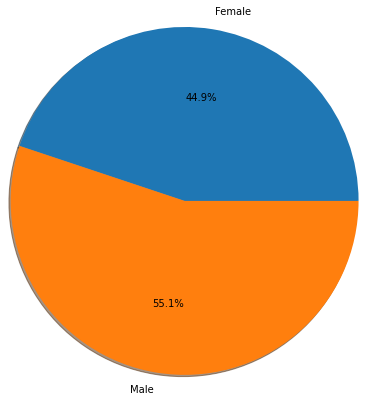

In [ ]:
# Group the dataset as per gender
yes_gender = yes_bank_account.groupby(yes_bank_account['gender_of_respondent']).count()
yes_gender

# Plot the pie chart
plt.pie(yes_gender['Respondent Age'], labels = yes_gender.index, autopct='%1.1f%%', shadow=True, radius = 2)
plt.show()

# Shows that we have more males than females with bank accounts

Text(0.5, 1.0, 'Respondents With Bank Accounts')

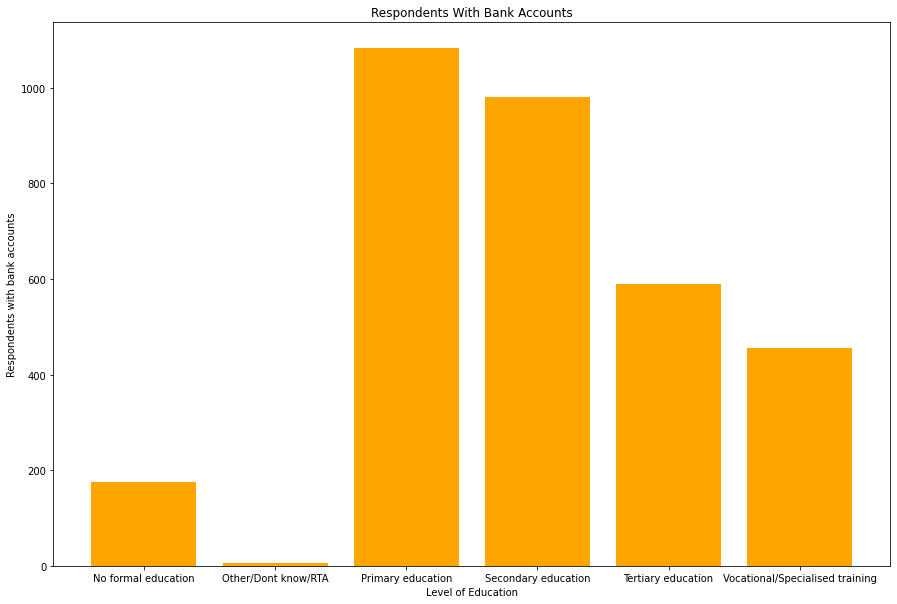

In [ ]:
# Analyze the education level with the most financial inclusion
yes_rural = yes_bank_account.groupby(yes_bank_account['education_level']).count()
yes_rural

# Plot a bar chart to show the education levels with the most financial inclusion
plt.figure(figsize=(15,10))
plt.bar(yes_rural.index, yes_rural['country'], color ="orange")

# Labelling the axis
plt.ylabel ("Respondents with bank accounts")
plt.xlabel("Level of Education")

# Title
plt.title ("Respondents With Bank Accounts")

# Shows that education contributed to whether respondents opened up bank accounts or not

In [ ]:
yes_bank_account.head

<bound method NDFrame.head of       country  year  ...                  education_level          Type of Job
0       Kenya  2018  ...              Secondary education        Self employed
2       Kenya  2018  ...  Vocational/Specialised training        Self employed
8       Kenya  2018  ...              Secondary education  Farming and Fishing
11      Kenya  2018  ...              Secondary education         Other Income
17      Kenya  2018  ...              Secondary education        Self employed
...       ...   ...  ...                              ...                  ...
23327  Uganda  2018  ...              Secondary education         Other Income
23331  Uganda  2018  ...              Secondary education         Other Income
23351  Uganda  2018  ...                Primary education            No Income
23358  Uganda  2018  ...                Primary education        Self employed
23362  Uganda  2018  ...              Secondary education         Other Income

[3291 rows x 13 colum

## b) Univariate analysis on respondents that don't have bank accounts

In [ ]:
no_bank_account = financial_data[financial_data['bank_account'] == "No"]
no_bank_account.shape

(20022, 13)

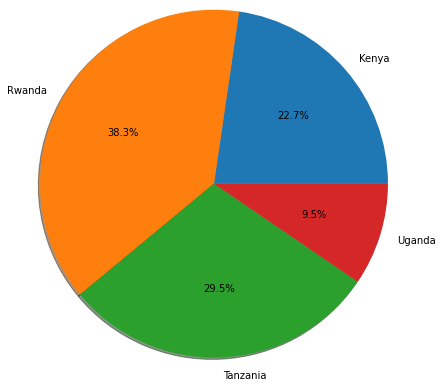

In [ ]:
# Analyze which country has respondents with the most bank accounts. Since there are only 4 countries, we can use a pie chart for this analysis
# First group the dataset as per country
no_country = no_bank_account.groupby(no_bank_account['country']).count()
no_country

# Plot the pie chart
plt.pie(no_country['bank_account'], labels = no_country.index, autopct='%1.1f%%', shadow=True, radius = 2)
plt.show()

# While Kenya had the highest financial inclusion, here we see that the highest respondents without access to financial inclusion came from Rwanda.
# This may be a problem and Rwanda may need to look at it's banking sector reforms. However, again, this may be an issue stemming from the fact that
# Rwandan dataset was picked in 2016 while the datasets for the other countries are of later years, whereby financial inclusion is expected to have risen.

Text(0.5, 1.0, ' Respondents without bank accounts per year')

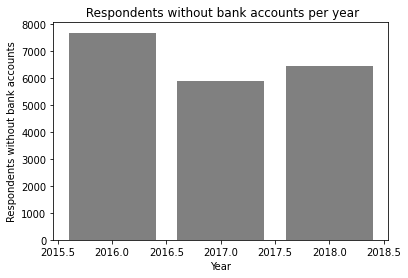

In [ ]:
# Analyze the years with the least financial inclusion
no_year = no_bank_account.groupby(no_bank_account['year']).count()
no_year

# Plot a bar chart to show the years with the most financial inclusion
plt.bar(no_year.index, no_year['country'], color ="grey")

# Labelling the axis
plt.ylabel ("Respondents without bank accounts")
plt.xlabel ("Year")

# Title
plt.title (" Respondents without bank accounts per year")

# Confirms the bar chart in the yes bank account section

Text(0.5, 1.0, 'Location of Bank Accounts')

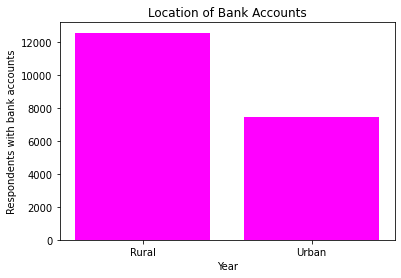

In [ ]:
# Analyze the years with the most financial inclusion
no_rural = no_bank_account.groupby(no_bank_account['location']).count()
no_rural

# Plot a bar chart to show the years with the most financial inclusion
plt.bar(no_rural.index, no_rural['country'], color ="magenta")

# Labelling the axis
plt.ylabel ("Respondents with bank accounts")
plt.xlabel("Year")

# Title
plt.title ("Location of Bank Accounts")

# While the analysis for the respondents with bank accounts showed that they opened up bank accounts in an almost similar manner both in the rural and 
# urban settings, respondents without bank accounts were more skewed towards the rural settings.

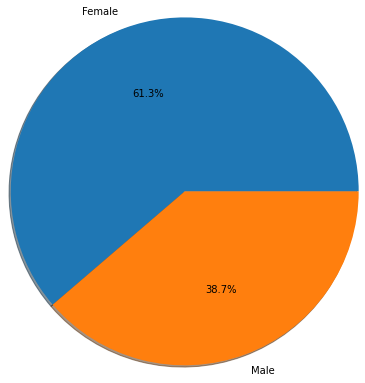

In [ ]:
# Group the dataset as per gender
no_gender = no_bank_account.groupby(no_bank_account['gender_of_respondent']).count()
no_gender

# Plot the pie chart
plt.pie(no_gender['Respondent Age'], labels = no_gender.index, autopct='%1.1f%%', shadow=True, radius = 2)
plt.show()

# More females than males with witoutbank accounts

Text(0.5, 1.0, 'Respondents Without Bank Accounts')

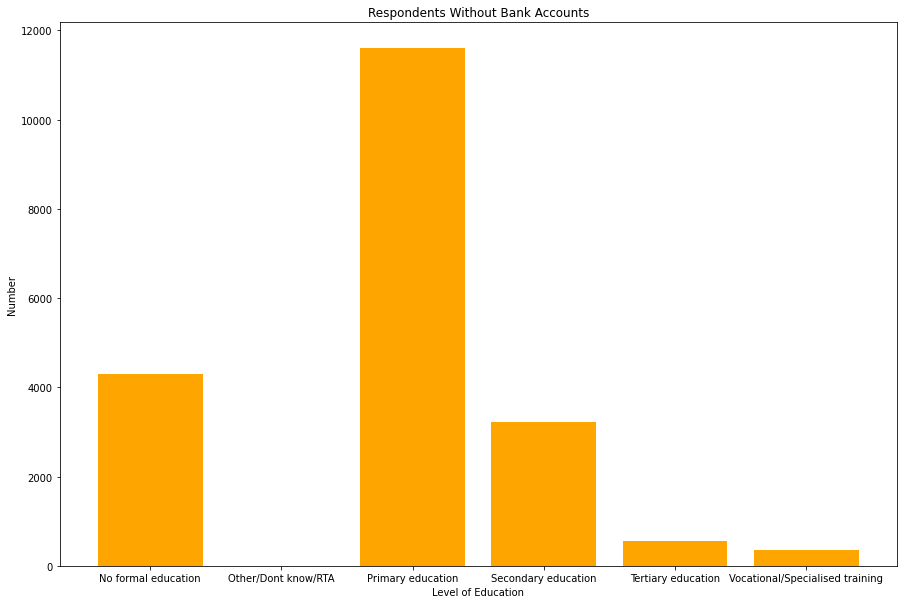

In [ ]:
# Analyze the education level with the least financial inclusion
no_rural = no_bank_account.groupby(no_bank_account['education_level']).count()
no_rural

# Plot a bar chart to show the education levels with the most financial inclusion
plt.figure(figsize=(15,10))
plt.bar(no_rural.index, no_rural['country'], color ="orange")

# Labelling the axis
plt.ylabel ("Number")
plt.xlabel("Level of Education")

# Title
plt.title ("Respondents Without Bank Accounts")

# Interestingly, though education contributed to whether respondents opened up bank accounts or not, a low level of education (primary school)
# did not convince the respondents to open up bank accounts

In summarizing the univariate analysis above, some interesting aspects were realized from the dataset. However, we should note that the dataset has been collected from different countries during different years. 

Additionally, the sample size was not uniform in all the countries (with some countries having more respondents than others) which could tilt the bias towards the economic characteristics of that country,

Finally, we are not told what variable was used to determine the sample population. Was it age, lebel of education etc? as bias may also be created in the data based on how the data was collected e.g. looking at the level of education, if the primary school respondents have a heaviwe weight in the sample, then they are going to heavily influence the results of the analysis etc

# **4. Multivariate Analysis:**